### 6.5 Unsupervised Machine Learning

#### This script contains the following 

#### 1. Import libraries and data

#### 2. Data prep

#### 3. The elbow technique

#### 4. K-means clustering

        4.1 Visualizations
        4.2 Descriptive statistics and insights
#### 5. Export data

#### 1. Import libraries and data

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [7]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [9]:
#set path
path = '/Users/mohammedRusso/Documents/DATA_ANALYST_COURSE/DATA_Immersion_Submissions/Assingment 6/04-2025 Billionaire Statistics'

In [290]:
# load dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Billionaires Statistics_cleaned.csv'))

#### 2. Data Prep

In [319]:
df.head()

,Rank,NetWorth($B),Age,Country,City,Industries,Self Made,Gender,Last Name,First Name,Birth Year,CPI Index,CPI Change,Country GDP,Country tertiary education enrollment,Country primary education enrollment,Country life expectancy,Population of country
0,1,211.0,74,France,Paris,Fashion & Retail,False,M,Arnault,Bernard,1949,110.05,1.1,2715520000000,65.6,102.5,82.5,67059887
1,2,180.0,51,United States,Austin,Automotive,True,M,Musk,Elon,1971,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523
2,3,114.0,59,United States,Medina,Technology,True,M,Bezos,Jeff,1964,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523
3,4,107.0,78,United States,Lanai,Technology,True,M,Ellison,Larry,1944,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523
4,5,106.0,92,United States,Omaha,Finance & Investments,True,M,Buffett,Warren,1930,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523


In [295]:
# drop column
df = df.drop('Unnamed: 0', axis=1)

In [297]:
# Convert country gdp to int
df['Country GDP'] = df['Country GDP'].astype(int)

In [299]:
# Remove % symbol from value and convert it to float 
df['Country tertiary education enrollment'] = df['Country tertiary education enrollment'].str.rstrip('%').astype('float') / 100

In [301]:
df['Country tertiary education enrollment'] = df['Country tertiary education enrollment'].astype('float') * 100

In [303]:
# Remove % symbol from value and convert it to float 
df['Country primary education enrollment'] = df['Country primary education enrollment'].str.rstrip('%').astype('float') / 100

In [305]:
df['Country primary education enrollment'] = df['Country primary education enrollment'].astype('float') * 100

In [307]:
df.columns

Index(['Rank', 'NetWorth($B)', 'Age', 'Country', 'City', 'Industries',
       'Self Made', 'Gender', 'Last Name', 'First Name', 'Birth Year',
       'CPI Index', 'CPI Change', 'Country GDP',
       'Country tertiary education enrollment',
       'Country primary education enrollment', 'Country life expectancy',
       'Population of country'],
      dtype='object')

In [309]:
df_numerical1 = df.drop(columns=['Rank', 'Country', 'City', 'Industries', 'Self Made', 'Gender', 'Last Name', 'First Name'])

In [311]:
df_numerical1.head()

,NetWorth($B),Age,Birth Year,CPI Index,CPI Change,Country GDP,Country tertiary education enrollment,Country primary education enrollment,Country life expectancy,Population of country
0,211.0,74,1949,110.05,1.1,2715520000000,65.6,102.5,82.5,67059887
1,180.0,51,1971,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523
2,114.0,59,1964,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523
3,107.0,78,1944,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523
4,106.0,92,1930,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523


In [313]:
df_numerical1['Country GDP (Billions)'] = (df_numerical1['Country GDP'] / 1_000_000_000).round(2)

In [315]:
df_numerical1['Population of country (Millions)'] = (df_numerical1['Population of country']/ 1_000_000).round(2)

In [286]:
df_numerical1 = df.drop(columns=['Country GDP', 'Population of country'])

In [317]:
df_numerical1.head()

,NetWorth($B),Age,Birth Year,CPI Index,CPI Change,Country GDP,Country tertiary education enrollment,Country primary education enrollment,Country life expectancy,Population of country,Country GDP (Billions),Population of country (Millions)
0,211.0,74,1949,110.05,1.1,2715520000000,65.6,102.5,82.5,67059887,2715.52,67.06
1,180.0,51,1971,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523,21427.70,328.24
2,114.0,59,1964,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523,21427.70,328.24
3,107.0,78,1944,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523,21427.70,328.24
4,106.0,92,1930,117.24,7.5,21427700000000,88.2,101.8,78.5,328239523,21427.70,328.24


In [327]:
# Crate new df with numerical columns 
df_numcols = df_numerical1[['NetWorth($B)', 'Age', 'CPI Index', 'CPI Change', 
                           'Country tertiary education enrollment', 
                           'Country primary education enrollment',
                           'Country life expectancy',
                           'Country GDP (Billions)', 
                           'Population of country (Millions)']]

In [329]:
df_numcols.head()

,NetWorth($B),Age,CPI Index,CPI Change,Country tertiary education enrollment,Country primary education enrollment,Country life expectancy,Country GDP (Billions),Population of country (Millions)
0,211.0,74,110.05,1.1,65.6,102.5,82.5,2715.52,67.06
1,180.0,51,117.24,7.5,88.2,101.8,78.5,21427.70,328.24
2,114.0,59,117.24,7.5,88.2,101.8,78.5,21427.70,328.24
3,107.0,78,117.24,7.5,88.2,101.8,78.5,21427.70,328.24
4,106.0,92,117.24,7.5,88.2,101.8,78.5,21427.70,328.24


In [351]:
from sklearn.preprocessing import StandardScaler
df_numcols_scaled = StandardScaler().fit_transform(df_numcols)

#### 3. Elbow Technique

In [371]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [375]:
score = [kmeans[i].fit(df_numcols).score(df_numcols) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-227702053276.25125,
 -3197567078.5691524,
 -1827630716.4864917,
 -828854177.1270821,
 -633628761.7898846,
 -197814211.95130223,
 -95200455.81368773,
 -52838489.71542713,
 -31755787.71624377]

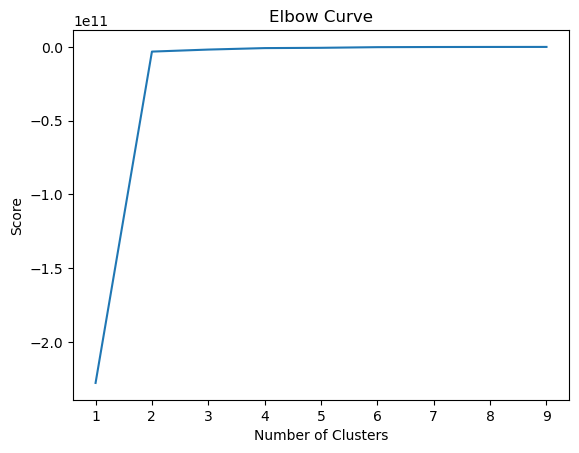

In [377]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow is at k2 as it flattens out after 2. This means that the optimal count for your clusters is 2.

#### 3. k-means clustering

In [419]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [421]:
# Fit the k-means object to the data.

kmeans.fit(df_numcols)

KMeans(n_clusters=3)

In [423]:
df_numcols['clusters'] = kmeans.fit_predict(df_numcols)

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_91127/2546454280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numcols['clusters'] = kmeans.fit_predict(df_numcols)


In [425]:
df_numcols.head()

,NetWorth($B),Age,CPI Index,CPI Change,Country tertiary education enrollment,Country primary education enrollment,Country life expectancy,Country GDP (Billions),Population of country (Millions),clusters
0,211.0,74,110.05,1.1,65.6,102.5,82.5,2715.52,67.06,0
1,180.0,51,117.24,7.5,88.2,101.8,78.5,21427.70,328.24,1
2,114.0,59,117.24,7.5,88.2,101.8,78.5,21427.70,328.24,1
3,107.0,78,117.24,7.5,88.2,101.8,78.5,21427.70,328.24,1
4,106.0,92,117.24,7.5,88.2,101.8,78.5,21427.70,328.24,1


In [427]:
df_numcols['clusters'].value_counts()

clusters
0    1199
1     754
2     523
Name: count, dtype: int64

### 3.1 Visualization

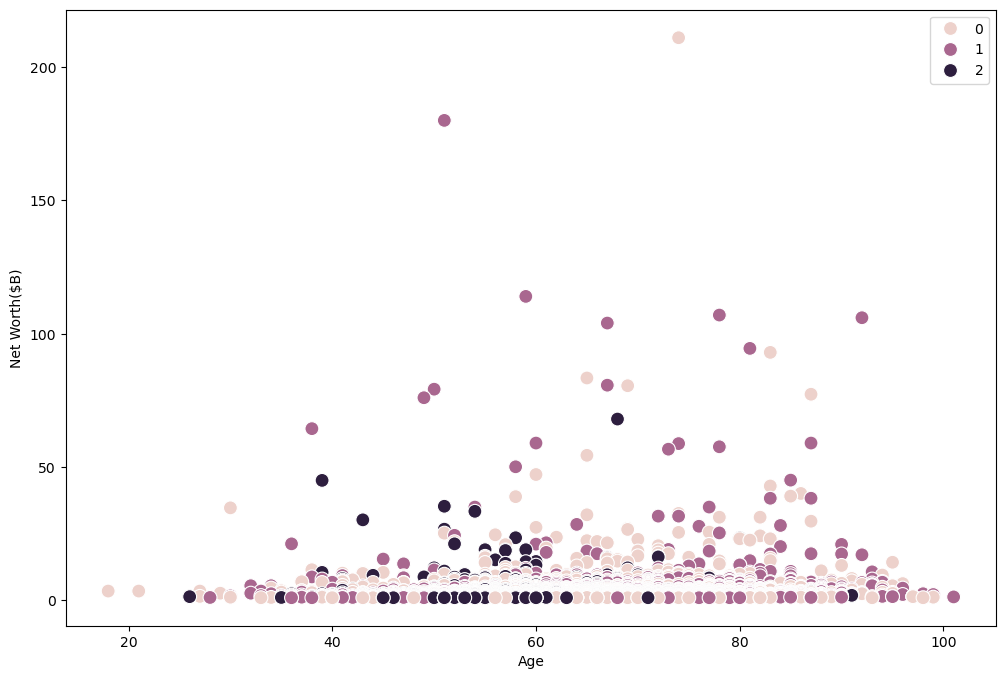

In [440]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numcols['Age'], y=df_numcols['NetWorth($B)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Net Worth($B)') # Label y-axis.
plt.show()

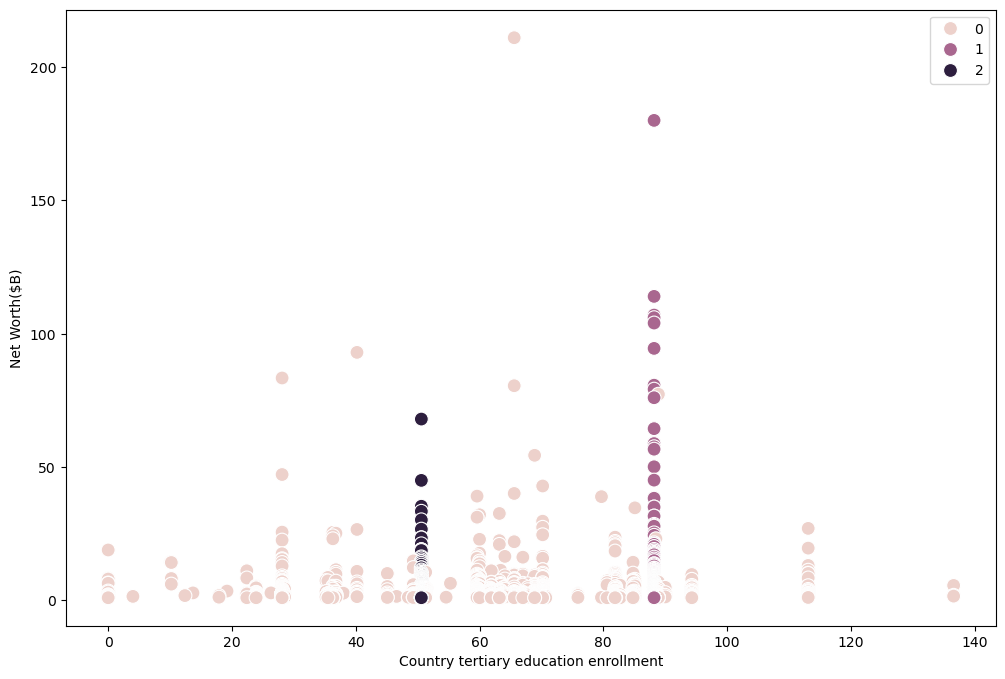

In [448]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numcols['Country tertiary education enrollment'], y=df_numcols['NetWorth($B)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Country tertiary education enrollment') # Label x-axis.
plt.ylabel('Net Worth($B)') # Label y-axis.
plt.show()

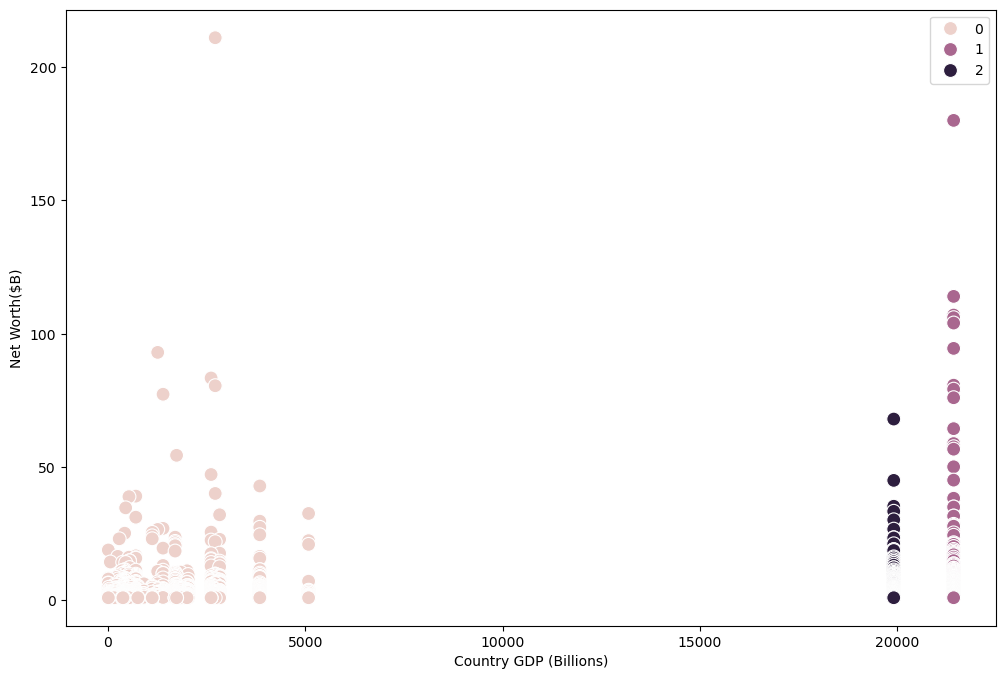

In [454]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numcols['Country GDP (Billions)'], y=df_numcols['NetWorth($B)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Country GDP (Billions)') # Label x-axis.
plt.ylabel('Net Worth($B)') # Label y-axis.
plt.show()

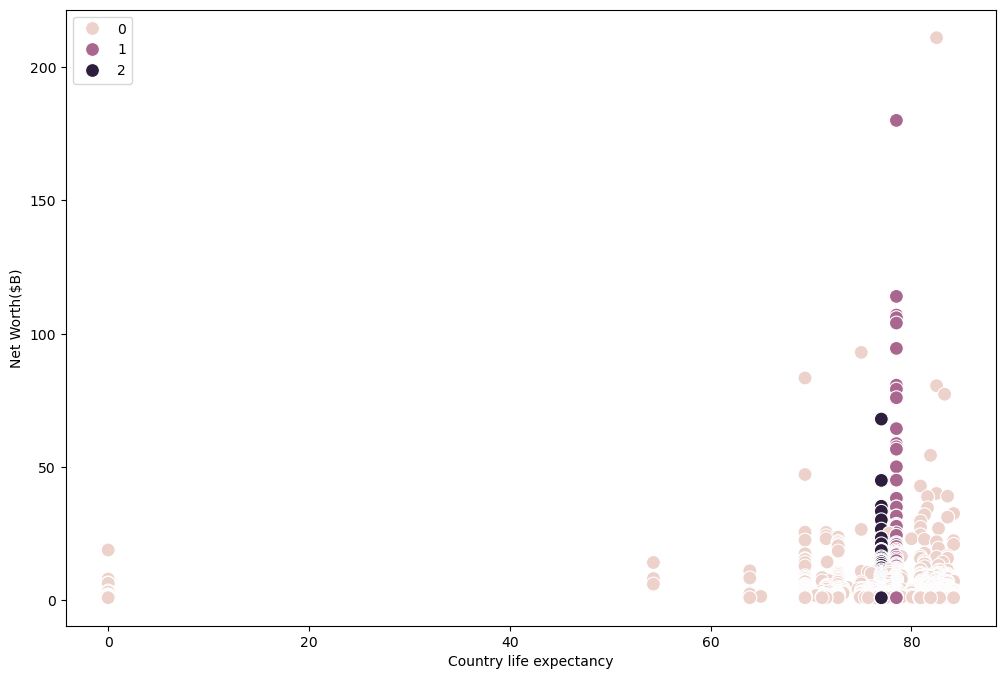

In [456]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numcols['Country life expectancy'], y=df_numcols['NetWorth($B)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Country life expectancy') # Label x-axis.
plt.ylabel('Net Worth($B)') # Label y-axis.
plt.show()

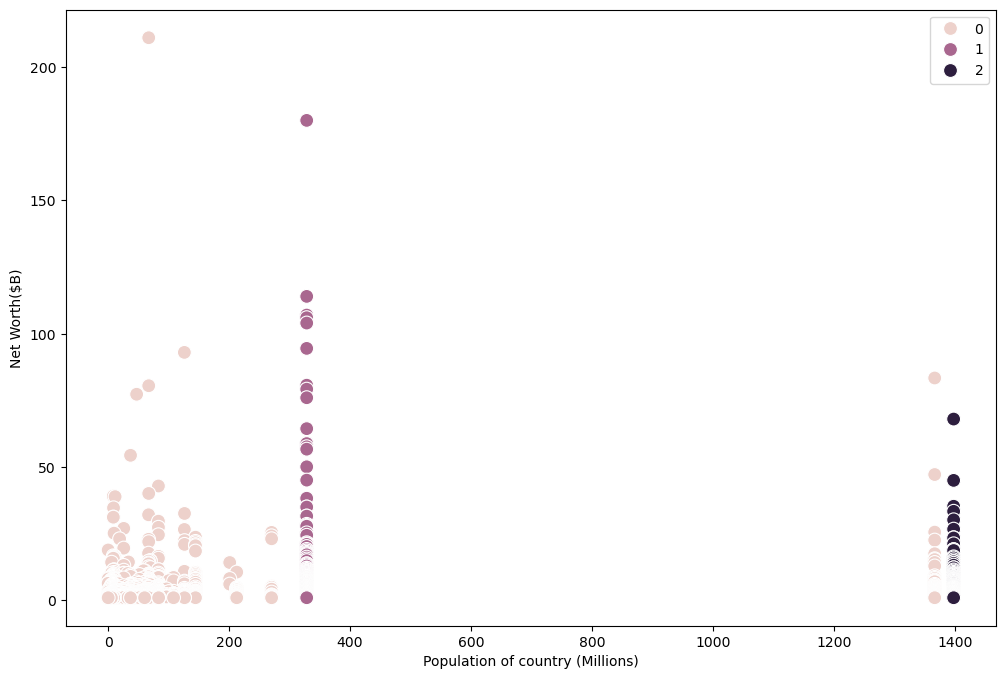

In [479]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numcols['Population of country (Millions)'], y=df_numcols['NetWorth($B)'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population of country (Millions)') # Label x-axis.
plt.ylabel('Net Worth($B)') # Label y-axis.
plt.show()

#### 3.2 Descriptive statistics and insights

In [469]:
df_numcols.loc[df_numcols['clusters'] == 2, 'cluster'] = 'dark purple'
df_numcols.loc[df_numcols['clusters'] == 1, 'cluster'] = 'purple'
df_numcols.loc[df_numcols['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_91127/4290111595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numcols.loc[df_numcols['clusters'] == 2, 'cluster'] = 'dark purple'


In [471]:
df_numcols.columns

Index(['NetWorth($B)', 'Age', 'CPI Index', 'CPI Change',
       'Country tertiary education enrollment',
       'Country primary education enrollment', 'Country life expectancy',
       'Country GDP (Billions)', 'Population of country (Millions)',
       'clusters', 'cluster'],
      dtype='object')

In [477]:
df_numcols.groupby('clusters').agg({
    'Age': ['mean', 'median'],
    'Country tertiary education enrollment': ['mean', 'median'],
    'Country life expectancy': ['mean', 'median'],
    'Country GDP (Billions)': ['mean', 'median'],
    'Population of country (Millions)': ['mean', 'median']
})

Age        Country tertiary education enrollment         \
                  mean median                                  mean median   
clusters                                                                     
dark purple  58.889101   58.0                             50.600000   50.6   
pink         66.022519   66.0                             60.278649   61.9   
purple       67.306366   67.0                             88.200000   88.2   

            Country life expectancy        Country GDP (Billions)            \
                               mean median                   mean    median   
clusters                                                                      
dark purple               77.000000   77.0           19910.000000  19910.00   
pink                      77.202585   80.9            1759.614912   1699.88   
purple                    78.500000   78.5           21427.700000  21427.70   

            Population of country (Millions)           
                                        mean   median  
clusters                                               
dark purple                      1397.720000  1397.72  
pink                              237.506522    66.83  
purple                            328.240000   328.24

##### **Age**
**Dark Purple Cluster**:

- Mean Age: ~58.9 years | Median Age: 58 years

- This cluster represents the youngest population among the three.

**Pink Cluster**:

- Mean Age: ~66.0 years | Median Age: 66 years

- Slightly older than the dark purple cluster.

**Purple Cluster**:

- Mean Age: ~67.3 years | Median Age: 67 years

- The oldest population, though only marginally older than the pink cluster.

**Insight**: The purple and pink clusters likely represent more mature/aging populations, while the dark purple cluster is relatively younger. This could imply differences in workforce dynamics or dependency ratios.

#### **Tertiary Education Enrollment**
**Dark Purple Cluster:**

- Mean & Median: 50.6%

- Moderate enrollment, suggesting balanced education access.

**Pink Cluster:**

- Mean: ~60.3% | Median: 61.9%

- Higher enrollment than dark purple, indicating better education infrastructure or policies.

**Purple Cluster:** 

- Mean & Median: 88.2%

- Exceptionally high enrollment, likely representing highly developed economies with strong education systems.

**Insight:** The purple cluster stands out as having near-universal tertiary education, possibly correlating with higher GDP. The pink cluster is intermediate, while the dark purple cluster lags behind.

#### **Life Expectancy**
**Dark Purple Cluster:**

- Mean & Median: 77 years

- Aligns with global averages but is the lowest among the clusters.

**Pink Cluster:**

- Mean: ~77.2 years | Median: 80.9 years

Note the discrepancy between mean and median suggests outliers (e.g., countries with significantly lower life expectancy pulling the mean down).

**Purple Cluster:**

- Mean & Median: 78.5 years

- The highest life expectancy, though only slightly above the dark purple cluster.

**Insight:** The purple cluster likely has advanced healthcare systems. The pink cluster’s outlier(s) may indicate socioeconomic disparities or regional challenges.

#### **GDP (Billions)**
**Dark Purple Cluster:**

- Mean & Median: $19,910 billion

- Extremely high, but identical mean/median suggests a small, homogeneous group (possibly a single country or very similar economies).

**Pink Cluster:**

- Mean: ~1,759.6 billion Median: 1,759.6 billion Median: 1,699.88 billion

- Much lower GDP, but with variability (mean ≈ median).

**Purple Cluster:**

- Mean & Median: $21,427.7 billion

- The highest GDP, again with no variability (likely a single country or identical economies).

**Insight:** The dark purple and purple clusters represent ultra-high-GDP entities (possibly large economies like the US or China, or aggregated regions like the EU). The pink cluster includes smaller or developing economies.

#### 5. Population (Millions)
**Dark Purple Cluster:**

- Mean & Median: ~1,397.72 million

- Massive population, likely a single large country (e.g., China or India).

**Pink Cluster:**

- Mean: ~237.5 million | Median: 66.83 million

- Discrepancy between mean and median indicates a few highly populous countries skewing the average (e.g., the US or Indonesia alongside smaller nations).

**Purple Cluster:**

- Mean & Median: 328.24 million

- Moderate population, possibly a single developed country (e.g., the US).

**Insight:** The dark purple cluster is likely a populous giant, while the pink cluster is diverse. The purple cluster’s population aligns with smaller but wealthier nations.

#### Propose what these results could be useful for in future steps of an analytics pipeline.

 - Conduct deeper demographic or consumer behavior analysis within each cluster.

 - Map clusters to real-world regions/countries for actionable targeting.

 - Predict GDP growth, education gaps, or healthcare demands by modeling trends within clusters (e.g., forecasting aging-related costs in the purple cluster).